# Report

In [5]:
import pandas as pd
import polars as pl
import plotnine as pn
import dask.dataframe as dd

In [6]:
from dask.distributed import Client

Client()

distributed.diskutils - INFO - Found stale lock file and directory '/d/hpc/home/jg0665/notebooks/dask-worker-space/worker-8f4u0oqb', purging
distributed.diskutils - INFO - Found stale lock file and directory '/d/hpc/home/jg0665/notebooks/dask-worker-space/worker-m5w0ergl', purging
distributed.diskutils - INFO - Found stale lock file and directory '/d/hpc/home/jg0665/notebooks/dask-worker-space/worker-fezh_f5v', purging
distributed.diskutils - INFO - Found stale lock file and directory '/d/hpc/home/jg0665/notebooks/dask-worker-space/worker-gu78kmgq', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 125.59 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35115,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 125.59 GiB
Comm: tcp://127.0.0.1:45849,Total threads: 1
Dashboard: http://127.0.0.1:40897/status,Memory: 31.40 GiB
Nanny: tcp://127.0.0.1:37997,


In [35]:
files = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]
#files = ['./data/2022.gz.parquet', './data/2021.gz.parquet']
df = dd.read_parquet(files)

In [36]:
df.min().compute()

/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, self.method)(*args, **kwargs)
/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, self.method)(*args, **kwargs)
/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  S

index                                                                  0
Vehicle Year                                                           0
zipcode                                                            10001
Borough Code                                                           1
Street name                                                        1 AVE
BOROCODE                                                               1
lng                                                           -74.040596
lat                                                             40.56772
cafe_count                                                             1
Violation Price                                                        0
Vehicle Color                                                      Black
time_of_ticket                                       2015-01-01 00:45:00
temp                                                               -12.8
humidity                                           

In [37]:
df.max().compute()

/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, self.method)(*args, **kwargs)
/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, self.method)(*args, **kwargs)
/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  S

index                                                   2248183
Vehicle Year                                               2069
zipcode                                                   11694
Borough Code                                                  4
Street name                                         ZULETTE AVE
BOROCODE                                                      4
lng                                                   -73.78155
lat                                                   40.907249
cafe_count                                                   78
Violation Price                                             515
Vehicle Color                                            Yellow
time_of_ticket                              2022-12-31 23:49:00
temp                                                       31.9
humidity                                                   95.8
snowdepth                                                 183.8
windspeed                               

In [38]:
agg = { 'Violation Price': ['mean', 'std', 'count'] }

by_color = df.groupby('Vehicle Color').agg(agg).compute()
by_body_type = df.groupby('Vehicle Body Type').agg(agg).compute()
by_make = df.groupby('Vehicle Make').agg(agg).compute()
by_vehicle_year = df.groupby('Vehicle Year').agg(agg).compute()
by_borough = df.groupby('Borough Code').agg(agg).compute()

In [39]:
by_color.columns = ['price_mean', 'price_std', 'count']
by_color = by_color.reset_index()

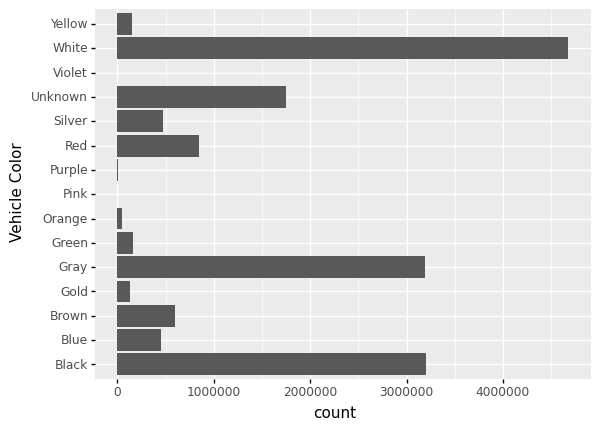

<ggplot: (1441487008491)>

In [40]:
pn.ggplot(by_color, pn.aes('Vehicle Color', 'count')) + pn.geom_col() + pn.coord_flip()

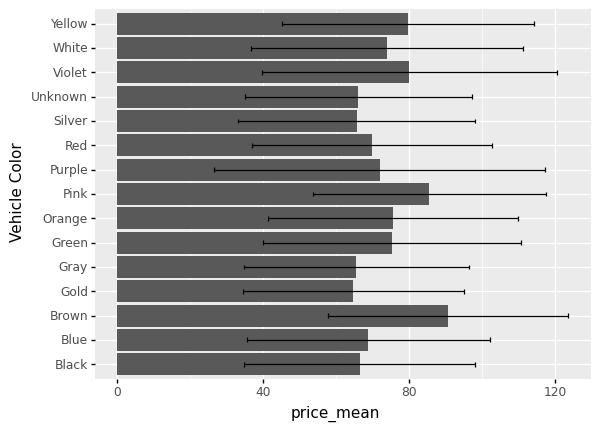

<ggplot: (1441547668526)>

In [41]:
(
  pn.ggplot(by_color, pn.aes('Vehicle Color', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
  + pn.coord_flip()
)

In [42]:
by_body_type.columns = ['price_mean', 'price_std', 'count']
by_body_type = by_body_type[by_body_type['count'] > 100000].reset_index()

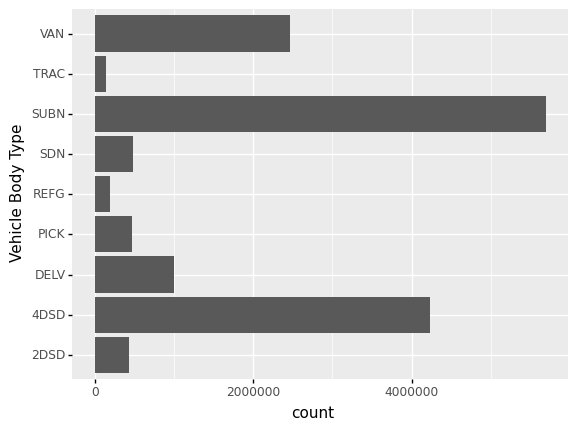

<ggplot: (1441488071334)>

In [43]:
pn.ggplot(by_body_type, pn.aes('Vehicle Body Type', 'count')) + pn.geom_col() + pn.coord_flip()

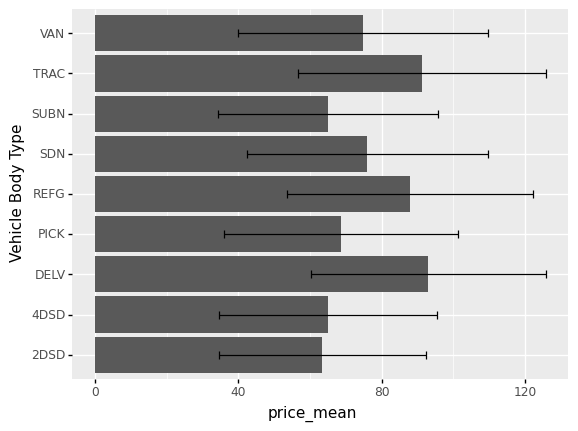

<ggplot: (1441488049038)>

In [44]:
(
  pn.ggplot(by_body_type, pn.aes('Vehicle Body Type', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
  + pn.coord_flip()
)


In [45]:
by_make.columns = ['price_mean', 'price_std', 'count']
by_make = by_make[by_make['count'] > 100000].reset_index()

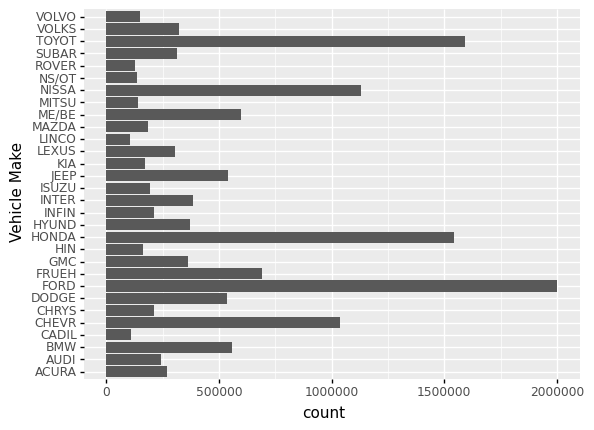

<ggplot: (1441488129928)>

In [46]:
pn.ggplot(by_make, pn.aes('Vehicle Make', 'count')) + pn.geom_col() + pn.coord_flip()

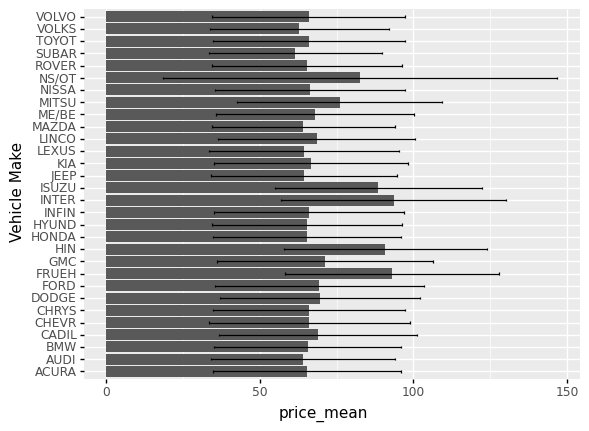

<ggplot: (1441445765012)>

In [47]:
(
  pn.ggplot(by_make, pn.aes('Vehicle Make', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
  + pn.coord_flip()
)

In [48]:
a = pl.from_pandas(by_vehicle_year.reset_index())
a.columns = ['vehicle_year', 'price_mean', 'price_std', 'count']
by_vehicle_year = (a
  .filter(pl.col('vehicle_year') > 1970)
  .filter(pl.col('vehicle_year') < 2022)
  .to_pandas()
)

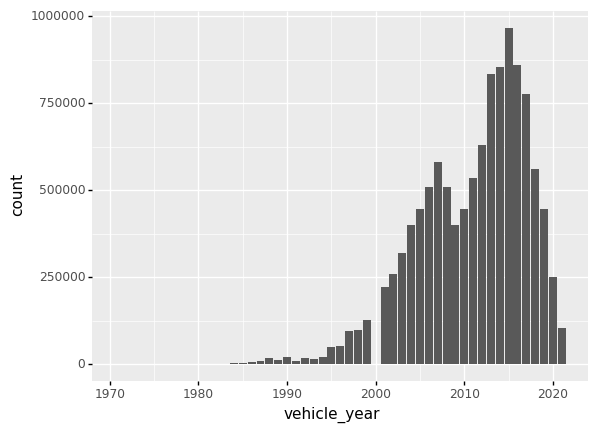

<ggplot: (1441445713725)>

In [49]:
pn.ggplot(by_vehicle_year, pn.aes('vehicle_year', 'count')) + pn.geom_col()

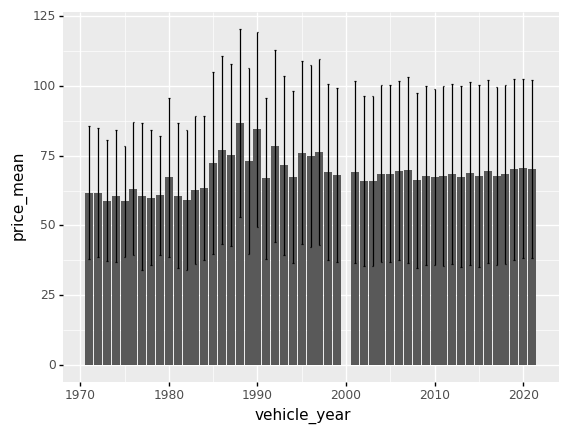

<ggplot: (1441445765943)>

In [50]:
(
  pn.ggplot(by_vehicle_year, pn.aes('vehicle_year', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
)

In [51]:
by_borough.columns = ['price_mean', 'price_std', 'count']
by_borough = by_borough.reset_index()
by_borough['Borough Code'] = by_borough['Borough Code'].astype(int)

borough_codes = pd.DataFrame([
  [1, 'Manhattan'],
  [2, 'The Bronx'],
  [3, 'Brooklyn'],
  [4, 'Queens'],
  [5, 'Staten Island'],
], columns = ['Borough Code', 'Borough'])

by_borough = by_borough.set_index('Borough Code').join(borough_codes.set_index('Borough Code'))

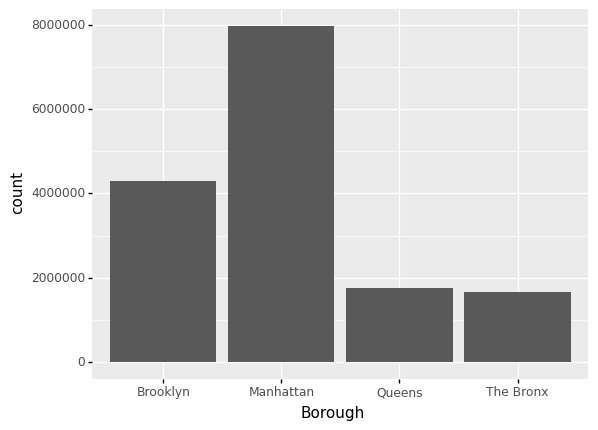

<ggplot: (1441445210661)>

In [52]:
pn.ggplot(by_borough, pn.aes('Borough', 'count')) + pn.geom_col()

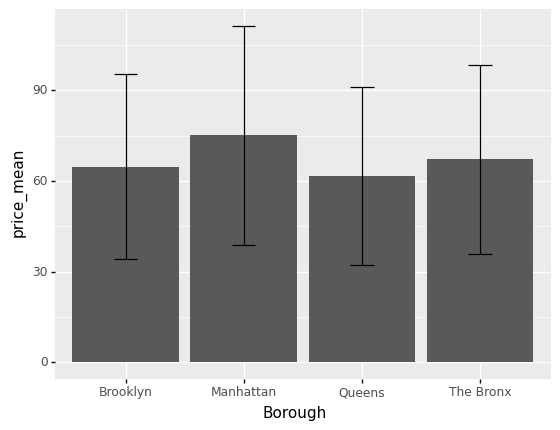

<ggplot: (1441445218473)>

In [53]:
(
  pn.ggplot(by_borough, pn.aes('Borough', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
)

# Weather

In [54]:
import pandas as pd
import polars as pl
import plotnine as pn
import dask.dataframe as dd
import numpy as np

In [55]:
from dask.distributed import Client

Client()

/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41307 instead


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:41307/status,
Dashboard: http://127.0.0.1:41307/status,Workers: 4
Total threads: 4,Total memory: 125.59 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46081,Workers: 4
Dashboard: http://127.0.0.1:41307/status,Total threads: 4
Started: Just now,Total memory: 125.59 GiB
Comm: tcp://127.0.0.1:41999,Total threads: 1
Dashboard: http://127.0.0.1:34533/status,Memory: 31.40 GiB
Nanny: tcp://127.0.0.1:44775,


In [56]:
files = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]
#files = ['./data/2022.gz.parquet', './data/2021.gz.parquet']
df = dd.read_parquet(files)

In [57]:
df['month'] = df['time_of_ticket'].dt.strftime('%m')

In [58]:
by_month_temp = df.groupby('month').agg({ 'temp': ['mean', 'std', 'count'] }).compute()
by_month_humidity = df.groupby('month').agg({ 'humidity': ['mean', 'std', 'count'] }).compute()
by_month_snowdepth = df.groupby('month').agg({ 'snowdepth': ['mean', 'std', 'count'] }).compute()
by_month_price = df.groupby('month').agg({ 'Violation Price': ['mean', 'std', 'count'] }).compute()

In [59]:
by_month_price.columns = ['by_month_price_mean', 'by_month_price_std', 'count']
by_month_price = by_month_price.reset_index()

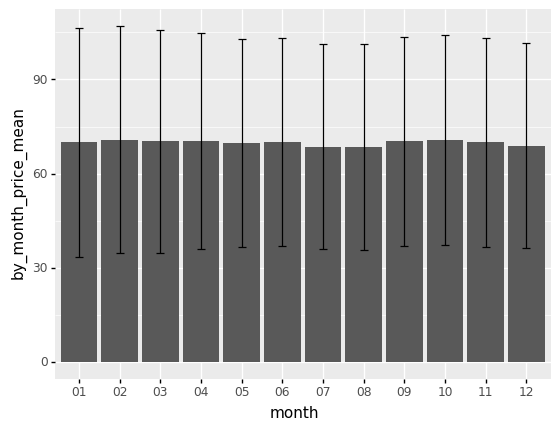

<ggplot: (1441421930921)>

In [60]:
pn.ggplot(by_month_price, pn.aes('month', 'by_month_price_mean')) + pn.geom_col() + pn.geom_errorbar(pn.aes(ymin='by_month_price_mean - by_month_price_std', ymax='by_month_price_mean + by_month_price_std'), width=.2)

In [61]:
by_month_temp.columns = ['temp_mean', 'temp_std', 'count']
by_month_temp = by_month_temp.reset_index()
by_month_temp

,month,temp_mean,temp_std,count
0,01,1.085193,4.538524,1455926
1,02,3.229403,5.609251,1209606
2,03,6.351817,5.061486,1260023
3,04,11.711789,4.448755,1053457
4,05,17.936705,4.416663,1065980
5,06,22.367139,3.631461,1171768
6,07,25.956133,2.368408,1287456
7,08,25.292515,2.329856,1303957
8,09,21.743793,3.124709,1290673
9,10,15.503042,4.069648,1386244


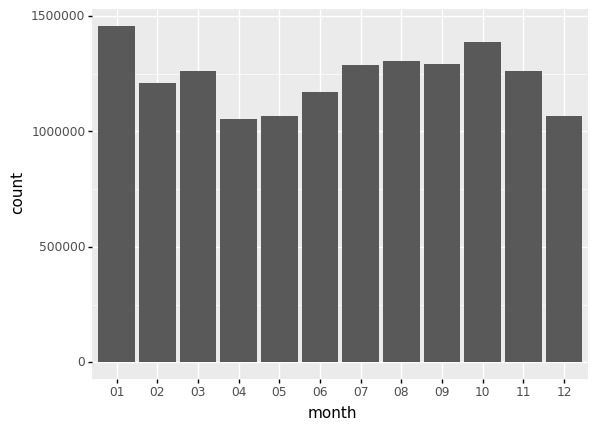

<ggplot: (1441419715359)>

In [62]:
pn.ggplot(by_month_temp, pn.aes('month', 'count')) + pn.geom_col()

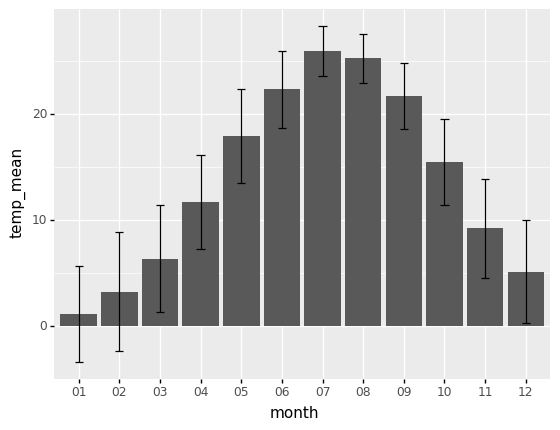

<ggplot: (1441445207221)>

In [63]:
pn.ggplot(by_month_temp, pn.aes('month', 'temp_mean')) + pn.geom_col() + pn.geom_errorbar(pn.aes(ymin='temp_mean - temp_std', ymax='temp_mean + temp_std'), width=.2)

In [64]:
by_month_humidity.columns = ['humidity_mean', 'humidity_std', 'count']
by_month_humidity = by_month_humidity.reset_index()

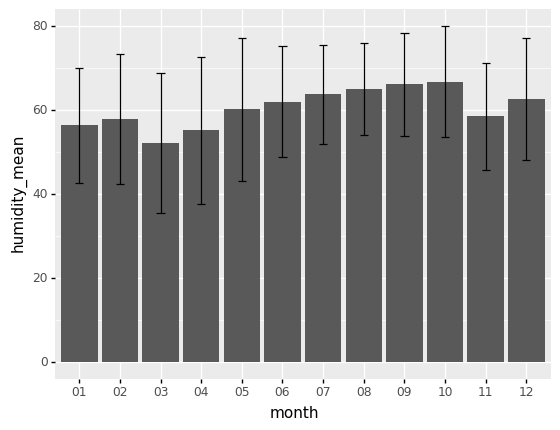

<ggplot: (1441419675471)>

In [65]:
pn.ggplot(by_month_humidity, pn.aes('month', 'humidity_mean')) + pn.geom_col() + pn.geom_errorbar(pn.aes(ymin='humidity_mean - humidity_std', ymax='humidity_mean + humidity_std'), width=.2)

In [66]:
by_month_snowdepth.columns = ['snowdepth_mean', 'snowdepth_std', 'count']
by_month_snowdepth = by_month_snowdepth.reset_index()

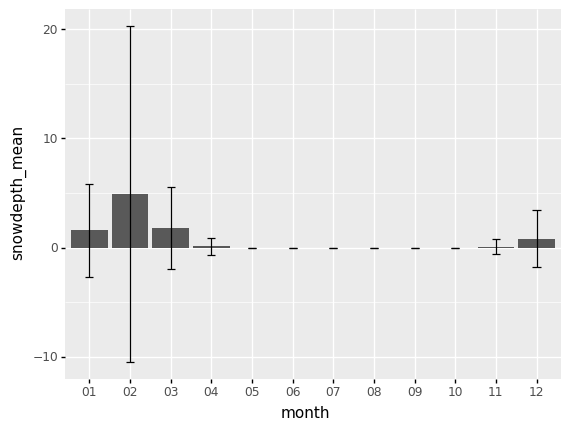

<ggplot: (1441418739643)>

In [67]:
pn.ggplot(by_month_snowdepth, pn.aes('month', 'snowdepth_mean')) + pn.geom_col() + pn.geom_errorbar(pn.aes(ymin='snowdepth_mean - snowdepth_std', ymax='snowdepth_mean + snowdepth_std'), width=.2)

In [68]:
df['tmp_temp'] = df['temp'].round(0)
by_temp_price = df.groupby('tmp_temp').agg({ 'Violation Price': ['mean', 'std', 'count'] }).compute()

In [69]:
by_temp_price.columns = ['by_temp_price_mean', 'by_temp_price_std', 'count']
by_temp_price = by_temp_price.reset_index()

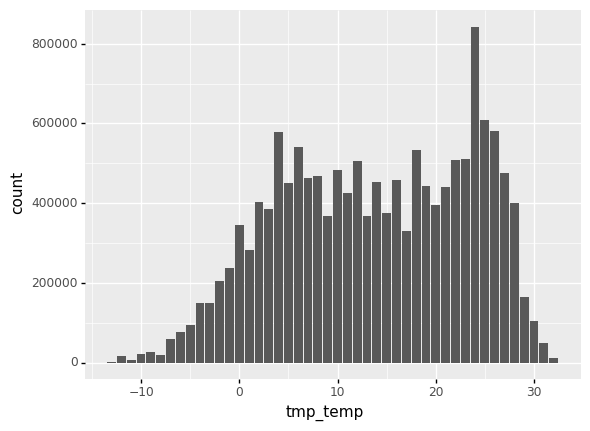

<ggplot: (1441371897323)>

In [70]:
pn.ggplot(by_temp_price, pn.aes('tmp_temp', 'count')) + pn.geom_col()

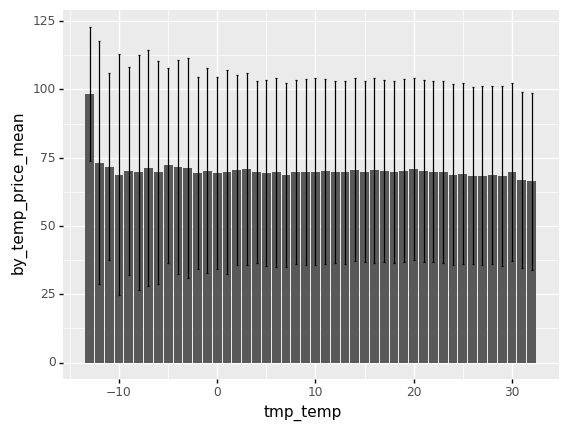

<ggplot: (1441418814046)>

In [71]:
pn.ggplot(by_temp_price, pn.aes('tmp_temp', 'by_temp_price_mean')) + pn.geom_col() + pn.geom_errorbar(pn.aes(ymin='by_temp_price_mean - by_temp_price_std', ymax='by_temp_price_mean + by_temp_price_std'), width=.2)

In [72]:
df['tmp_humidity'] = df['humidity'].round(0)
by_humidity_price = df.groupby('tmp_humidity').agg({ 'Violation Price': ['mean', 'std', 'count'] }).compute()

In [73]:
by_humidity_price.columns = ['by_humidity_price_mean', 'by_humidity_price_std', 'count']
by_humidity_price = by_humidity_price.reset_index()

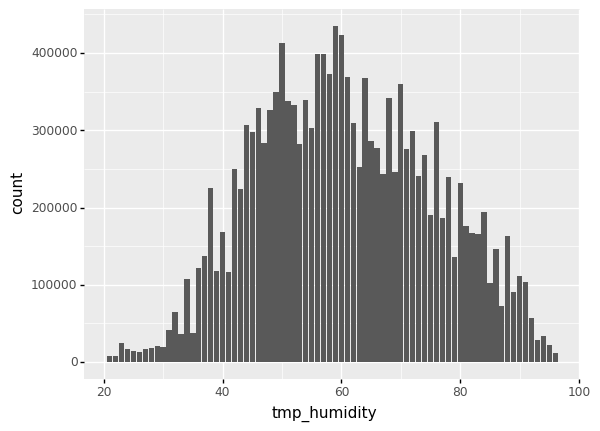

<ggplot: (1441371803516)>

In [74]:
pn.ggplot(by_humidity_price, pn.aes('tmp_humidity', 'count')) + pn.geom_col()

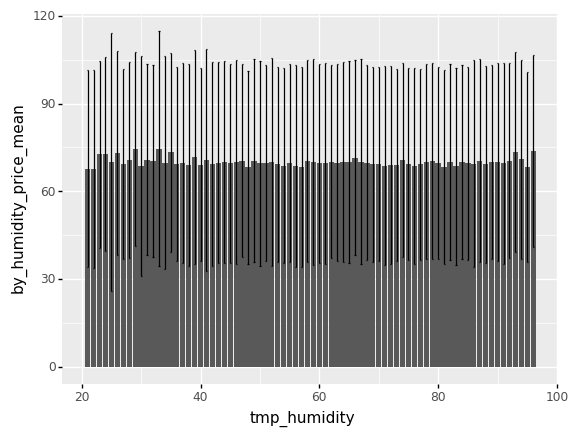

<ggplot: (1441371729655)>

In [75]:
pn.ggplot(by_humidity_price, pn.aes('tmp_humidity', 'by_humidity_price_mean')) + pn.geom_col() + pn.geom_errorbar(pn.aes(ymin='by_humidity_price_mean - by_humidity_price_std', ymax='by_humidity_price_mean + by_humidity_price_std'), width=.2)

In [76]:
df['tmp_snowdepth'] = df['snowdepth'].round(0)
by_snowdepth_price = df.groupby('tmp_snowdepth').agg({ 'Violation Price': ['mean', 'std', 'count'] }).compute()

In [77]:
by_snowdepth_price.columns = ['by_snowdepth_price_mean', 'by_snowdepth_price_std', 'count']
by_snowdepth_price = by_snowdepth_price.reset_index()

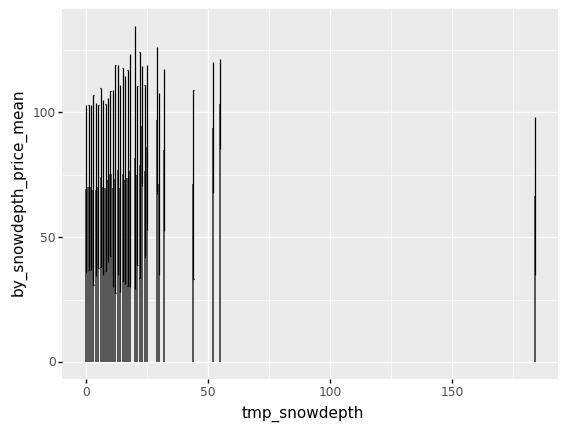

<ggplot: (1441371709754)>

In [78]:
pn.ggplot(by_snowdepth_price, pn.aes('tmp_snowdepth', 'by_snowdepth_price_mean')) + pn.geom_col() + pn.geom_errorbar(pn.aes(ymin='by_snowdepth_price_mean - by_snowdepth_price_std', ymax='by_snowdepth_price_mean + by_snowdepth_price_std'), width=.2)

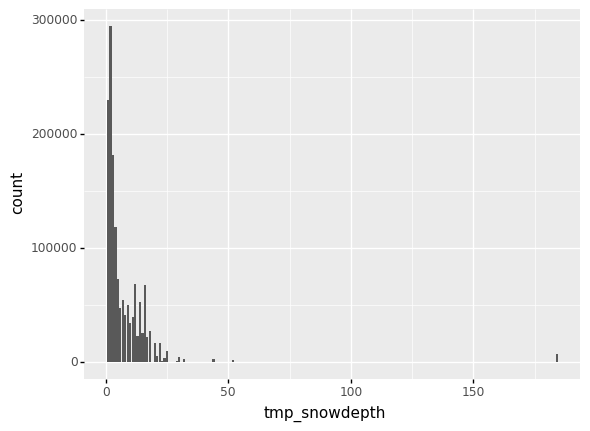

<ggplot: (1441371558551)>

In [79]:
by_snowdepth_price = by_snowdepth_price.drop(0)
pn.ggplot(by_snowdepth_price, pn.aes('tmp_snowdepth', 'count')) + pn.geom_col()

# Other

In [ ]:
import polars as pl
import pandas as pd
import plotnine as pn

In [ ]:
df = pl.read_parquet('./data/2022.gz.parquet')
df.head()

In [ ]:
df = df.with_columns([
    pl.col('Vehicle Body Type').cast(pl.Categorical),
    pl.col('Vehicle Make').cast(pl.Categorical),
    pl.col('Plate Type').cast(pl.Categorical),
    pl.col('Issuing Agency').cast(pl.Categorical),
    pl.col('Law Section').cast(pl.Utf8).cast(pl.Categorical),
])
df.head()

## Counts

In [ ]:
df_counts = (df
    .select(['Vehicle Body Type', 'Vehicle Make', 'Plate Type', 'Issuing Agency', 'Law Section',])
    .to_pandas()
    .melt()
    .groupby(['variable', 'value'])[['value']]
    .count()
    .rename({ 'value': 'count'}, axis=1)
    .reset_index()
)
df_counts


In [ ]:
df_counts.value_counts('variable')

In [ ]:
pn.ggplot(df_counts, pn.aes(x = 'value', y = 'count')) + pn.geom_col() + pn.facet_wrap('variable', scales='free')

## Issuer

In [ ]:
df_issuers = df.select([
    'Violation Location',
    'Violation Precinct',
    'Issuer Precinct',
    'Issuer Code',
    'Issuer Command',
    'Issuer Squad',
]).melt().to_pandas().value_counts()

In [ ]:
pd.DataFrame({ 'count': df_issuers }).reset_index().value_counts('variable')

In [ ]:
df.select(['Issuer Precinct']).groupby('Issuer Precinct').count().sort(pl.col('Issuer Precinct')).to_csv('precincts.csv')

In [ ]:
(pn.ggplot(df.select(['Issuer Code']).groupby('Issuer Code').count().filter(pl.col('count') < 100000).to_pandas())
    + pn.geom_histogram(pn.aes(x = 'count'), bins=50)
    + pn.scale_x_log10()
    + pn.scale_y_log10()
    + pn.xlab('number of violations issued by an issuer')
    + pn.ylab('count of issuers')
)

In [ ]:
df.select(['Issuer Code']).groupby('Issuer Code').count().filter(pl.col('count') > 100000)

## Misc

In [ ]:
df.select(['Violation Location']).groupby('Violation Location').count().sort(pl.col('Violation Location'))

In [ ]:
(pn.ggplot(df
        .select('Vehicle Year')
        .filter(pl.col('Vehicle Year') > 0)
        .filter(pl.col('Vehicle Year') <= 2022)
        .groupby('Vehicle Year').count()
        .to_pandas()
    ) +
    pn.geom_line(pn.aes(x = 'Vehicle Year', y = 'count'))
)

In [ ]:
df_makes = (df
    .select('Vehicle Make')
    .groupby('Vehicle Make')
    .count()
    .filter(pl.col('count') > 50000)
    .filter(pl.col('Vehicle Make') != None)
    .sort('count')
    .with_column(pl.col('Vehicle Make').cast(pl.Categorical))
)

(pn.ggplot(df_makes.to_pandas())
    + pn.geom_col(pn.aes(x = 'Vehicle Make', y = 'count'))
    + pn.coord_flip()
)

# Distributions over variables